In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
# yelp reviews dataset
data=pd.read_csv('/content/yelp.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [117]:
data.shape

(10000, 10)

In [118]:
data = data.drop(['business_id', 'date', 'review_id', 'type', 'user_id'], axis=1)
data.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [119]:
data['Text_len'] = data['text'].apply(len)
data.head()

,stars,text,cool,useful,funny,Text_len
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [120]:
data.describe()

,stars,cool,useful,funny,Text_len
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [121]:
yelp_text = data[['stars', 'text']]
yelp_text.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [122]:
yelp_text['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [123]:
#type1
import string
def remove_punc_stopword(text):
    text = text.lower() # Lowercasing
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) # Removing unnecessary characters
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  # Removing punctuations
    text = re.sub('\s+', ' ', text)  # Removing spaces
    text = re.sub(r'\[[0-9]*\]',' ',text) # Removing numbers
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) # Removing digits
    text = re.sub(r'\s+',' ',text) 
    return text

In [127]:
wl = WordNetLemmatizer()

In [128]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [124]:
yelp_new = yelp_text.copy()
yelp_new['text'] = yelp_new['text'].apply(remove_punc_stopword)
yelp_new.count()

stars    10000
text     10000
dtype: int64

In [125]:
yelp_new.head()

,stars,text
0,5,my wife took me here on my birthday for breakf...
1,5,i have no idea why some people give bad review...
2,4,love the gyro plate rice is so good and i also...
3,5,rosie dakota and i love chaparral dog park it ...
4,5,general manager scott petello is a good egg no...


In [126]:
def stopword(string):
    a= [i for i in string.split() if i not in stop]
    return ' '.join(a)

In [129]:
#type2
def remove_punc_stopword1(text):
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [73]:
yelp_text1 = yelp_text.copy()
yelp_text1['text'] = yelp_text1['text'].apply(remove_punc_stopword1)
yelp_text1.count()

stars    10000
text     10000
dtype: int64

In [74]:
yelp_text1.head()

,stars,text
0,5,"[wife, took, birthday, breakfast, excellent, w..."
1,5,"[idea, people, give, bad, reviews, place, goes..."
2,4,"[love, gyro, plate, rice, good, also, dig, can..."
3,5,"[rosie, dakota, love, chaparral, dog, park, co..."
4,5,"[general, manager, scott, petello, good, egg, ..."


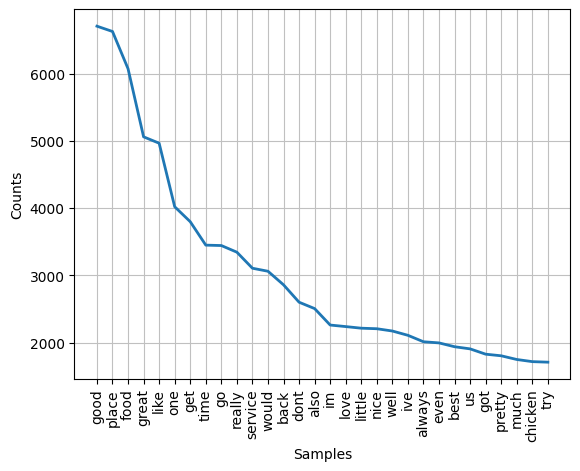

<Axes: xlabel='Samples', ylabel='Counts'>

In [75]:
words_split = []
for i in range(0,9999): 
    for word in yelp_text1['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [82]:
def stopword(string):
    a= [i for i in string.split() if i not in stop]
    return ' '.join(a)

In [83]:
star_text = yelp_text1['text'].values

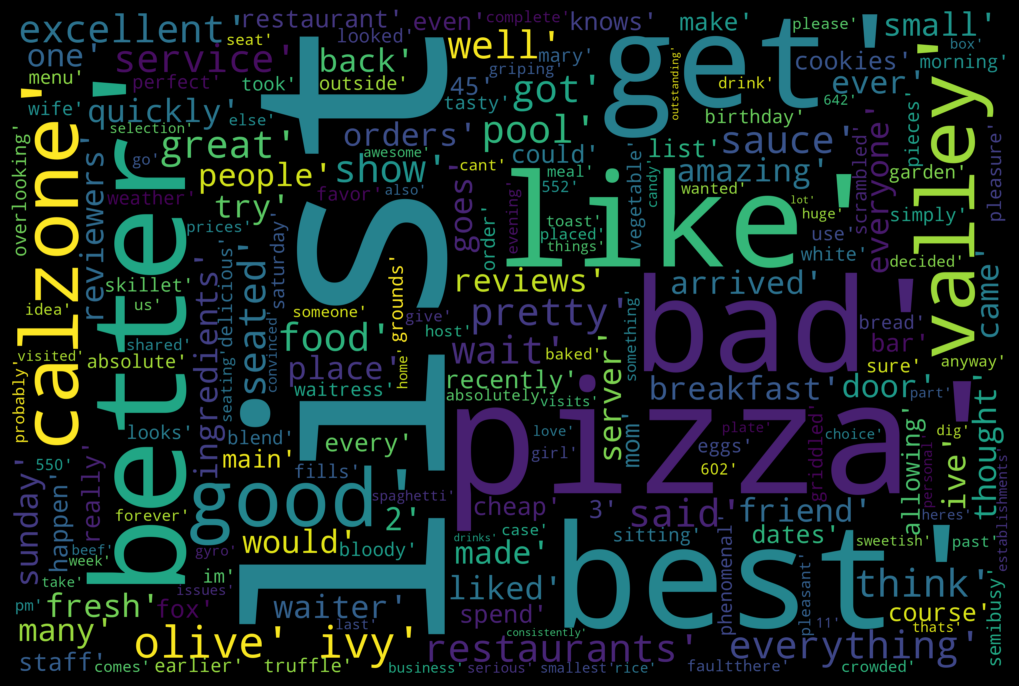

In [85]:
# WordCloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(star_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# ML Model

In [88]:
#USING TF-IDF
X = data['text']
y = data['stars']
cv = CountVectorizer()
X = cv.fit_transform(X)
test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []

tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)

grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
31,0.1,31,1.405


In [90]:
warnings.filterwarnings("ignore")
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

X = data['text']
y = data['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       144
           4       0.40      0.94      0.56       358
           5       0.78      0.35      0.48       338

    accuracy                           0.46      1000
   macro avg       0.24      0.26      0.21      1000
weighted avg       0.41      0.46      0.36      1000



In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [179]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(X_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           1       0.56      0.59      0.58        61
           2       0.50      0.35      0.41        99
           3       0.37      0.31      0.34       144
           4       0.49      0.53      0.51       358
           5       0.60      0.64      0.62       338

    accuracy                           0.52      1000
   macro avg       0.51      0.49      0.49      1000
weighted avg       0.52      0.52      0.52      1000

Confusion Matrix: [[ 36  13   4   4   4]
 [ 15  35  30  15   4]
 [  6  12  45  61  20]
 [  6   9  38 190 115]
 [  1   1   4 115 217]]


ValueError: ignored

In [104]:
# Vectorization for K-Means
documents = yelp_text['text']
documents

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [105]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(documents)

In [148]:
# Clustering model
true_k = 10
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init=1)
model.fit(x)


KMeans(max_iter=100, n_clusters=10, n_init=1)

In [149]:
print('Top terms per cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
  print("Cluster %d: " % i),
  for ind in order_centroids[i,:5]: # To get top 5 items per cluster.
    print('% s' % terms[ind]),

print('\n')
print('Prediction')

Top terms per cluster:
Cluster 0: 
sushi
thai
pho
rice
rolls
Cluster 1: 
bar
place
beer
good
happy
Cluster 2: 
food
good
service
place
excellent
Cluster 3: 
coffee
breakfast
good
place
eggs
Cluster 4: 
good
burger
chicken
salad
sandwich
Cluster 5: 
great
food
place
service
love
Cluster 6: 
store
ice
cream
love
chocolate
Cluster 7: 
mexican
tacos
salsa
food
chips
Cluster 8: 
pizza
crust
good
place
great
Cluster 9: 
place
like
just
time
great


Prediction


In [150]:
def tag_cluster(doc):
  vec = vectorizer.transform([doc])
  return model.predict(vec)[0]


In [151]:
clusters = [tag_cluster(doc) for doc in documents]

In [152]:
yelp_text['clusters'] = [tag_cluster(doc) for doc in yelp_text.text]
yelp_text.head()

,stars,text,clusters
0,5,My wife took me here on my birthday for breakf...,3
1,5,I have no idea why some people give bad review...,8
2,4,love the gyro plate. Rice is so good and I als...,6
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",9
4,5,General Manager Scott Petello is a good egg!!!...,9


In [153]:
yelp_text['clusters'].value_counts()

9    3191
4    1712
2    1003
1     984
0     606
6     581
5     534
3     516
7     495
8     378
Name: clusters, dtype: int64

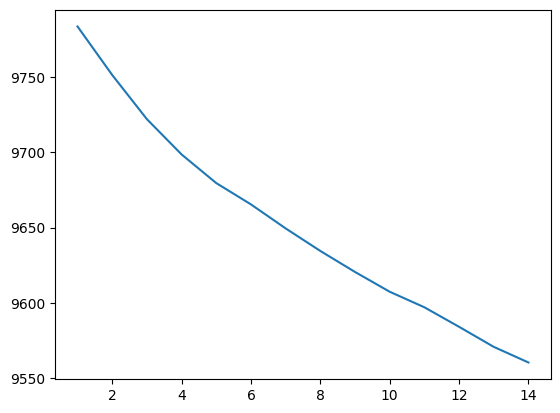

In [166]:
wcss = []

for i in range(1,15):
  clustering = KMeans(n_clusters=i,init='k-means++',random_state=42)
  clustering.fit(x)
  wcss.append(clustering.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
sns.lineplot(x = ks, y = wcss);
# Line breaks at 5, so the optimal value of k is 5.

In [146]:
yelp_text

,stars,text,clusters
0,5,My wife took me here on my birthday for breakf...,2
1,5,I have no idea why some people give bad review...,2
2,4,love the gyro plate. Rice is so good and I als...,4
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",4
4,5,General Manager Scott Petello is a good egg!!!...,4
...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,2
9996,4,Should be called house of deliciousness!\n\nI ...,3
9997,4,I recently visited Olive and Ivy for business ...,4
9998,2,My nephew just moved to Scottsdale recently so...,3


In [147]:
#LDA topic modellign
print(len(documents))
print(documents[:5])

10000
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object


In [158]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

In [160]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [163]:
# Preprocessing text for LDA
processed_docs = yelp_text['text'].map(preprocess)
processed_docs[:10]

0    [wife, take, birthday, breakfast, excellent, w...
1    [idea, people, review, place, go, probably, gr...
2    [love, gyro, plate, rice, good, candy, selection]
3    [rosie, dakota, love, chaparral, park, conveni...
4    [general, manager, scott, petello, good, assur...
5    [quiessence, simply, beautiful, windows, earth...
6    [drop, drive, food, good, cute, little, green,...
7    [luckily, travel, connect, flight, thank, phoe...
8    [definitely, come, happy, hour, price, amaze, ...
9    [nobuo, show, unique, talents, menu, carefully...
Name: text, dtype: object

In [167]:
#Creating a vocabulary
dictionary = gensim.corpora.Dictionary(processed_docs)

In [168]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
  

0 absolute
1 absolutely
2 amaze
3 arrive
4 best
5 better
6 birthday
7 blend
8 bloody
9 bread
10 breakfast


In [169]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [170]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[401]

[(20, 1),
 (25, 1),
 (39, 1),
 (66, 1),
 (72, 1),
 (87, 1),
 (107, 1),
 (144, 1),
 (219, 1),
 (276, 1),
 (321, 3),
 (348, 1),
 (364, 1),
 (381, 2),
 (621, 1),
 (842, 1),
 (868, 1),
 (930, 1),
 (988, 1),
 (1000, 1),
 (1117, 1),
 (1142, 1),
 (1229, 1),
 (1258, 1),
 (1265, 1),
 (1268, 1),
 (1306, 1),
 (1417, 1),
 (1457, 1),
 (1497, 1),
 (1557, 2),
 (1690, 3),
 (1691, 1),
 (1894, 1),
 (2335, 1),
 (2432, 1),
 (2433, 1)]

In [171]:
bow_doc_401 = bow_corpus[401]

for i in range(len(bow_doc_401)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_401[i][0], 
                                               dictionary[bow_doc_401[i][0]], 
                                                     bow_doc_401[i][1]))

Word 20 ("food") appears 1 time.
Word 25 ("like") appears 1 time.
Word 39 ("pretty") appears 1 time.
Word 66 ("drink") appears 1 time.
Word 72 ("go") appears 1 time.
Word 87 ("review") appears 1 time.
Word 107 ("area") appears 1 time.
Word 144 ("totally") appears 1 time.
Word 219 ("try") appears 1 time.
Word 276 ("open") appears 1 time.
Word 321 ("nice") appears 3 time.
Word 348 ("choices") appears 1 time.
Word 364 ("available") appears 1 time.
Word 381 ("shop") appears 2 time.
Word 621 ("enjoy") appears 1 time.
Word 842 ("bakery") appears 1 time.
Word 868 ("grill") appears 1 time.
Word 930 ("haven") appears 1 time.
Word 988 ("usual") appears 1 time.
Word 1000 ("theater") appears 1 time.
Word 1117 ("events") appears 1 time.
Word 1142 ("boat") appears 1 time.
Word 1229 ("outdoor") appears 1 time.
Word 1258 ("secret") appears 1 time.
Word 1265 ("concert") appears 1 time.
Word 1268 ("wander") appears 1 time.
Word 1306 ("american") appears 1 time.
Word 1417 ("paradise") appears 1 time.
Wor

In [172]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.16571405689214605),
 (1, 0.1118957505456425),
 (2, 0.15061456854016322),
 (3, 0.10686418965379356),
 (4, 0.11520017603460053),
 (5, 0.06512769689699988),
 (6, 0.13111203451051875),
 (7, 0.15990717565004522),
 (8, 0.17072036570463883),
 (9, 0.08840811553752029),
 (10, 0.0960565309762608),
 (11, 0.09905315292192528),
 (12, 0.04538689914886577),
 (13, 0.13982192003354801),
 (14, 0.06891290894444761),
 (15, 0.15758134926847764),
 (16, 0.12812977148015675),
 (17, 0.2649180995327332),
 (18, 0.16750048784141375),
 (19, 0.10614235322717039),
 (20, 0.029697272027603454),
 (21, 0.07365667301080212),
 (22, 0.15147680540149558),
 (23, 0.18010963349276898),
 (24, 0.11748958972895164),
 (25, 0.033245960209361144),
 (26, 0.1130976967973391),
 (27, 0.17833975212508252),
 (28, 0.07904169816460187),
 (29, 0.0655488966361848),
 (30, 0.11365341961676963),
 (31, 0.04780737364223474),
 (32, 0.09453354750417026),
 (33, 0.18010963349276898),
 (34, 0.09191755274099296),
 (35, 0.16402252653331223),
 (36,

In [173]:
# Running LDA using Bag of Words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [174]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"good" + 0.015*"place" + 0.012*"like" + 0.012*"food" + 0.010*"order" + 0.009*"drink" + 0.009*"great" + 0.009*"come" + 0.008*"go" + 0.007*"chicken"
Topic: 1 
Words: 0.028*"good" + 0.017*"place" + 0.015*"food" + 0.014*"like" + 0.013*"great" + 0.013*"service" + 0.010*"order" + 0.008*"come" + 0.008*"love" + 0.008*"time"
Topic: 2 
Words: 0.014*"food" + 0.014*"place" + 0.013*"time" + 0.012*"like" + 0.012*"good" + 0.010*"come" + 0.010*"salad" + 0.008*"go" + 0.007*"think" + 0.007*"great"
Topic: 3 
Words: 0.013*"time" + 0.013*"great" + 0.011*"love" + 0.009*"good" + 0.008*"place" + 0.008*"go" + 0.008*"store" + 0.007*"like" + 0.007*"service" + 0.006*"room"
Topic: 4 
Words: 0.022*"place" + 0.018*"like" + 0.012*"food" + 0.011*"good" + 0.010*"go" + 0.008*"great" + 0.008*"think" + 0.008*"look" + 0.008*"little" + 0.007*"know"
Topic: 5 
Words: 0.025*"place" + 0.018*"good" + 0.017*"time" + 0.012*"great" + 0.012*"pizza" + 0.011*"like" + 0.011*"food" + 0.010*"nice" + 0.010*"service"

In [175]:
# Performance evaluation of LDA using Bag of Words
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5806177854537964	 
Topic: 0.030*"place" + 0.024*"good" + 0.022*"food" + 0.020*"great" + 0.013*"like" + 0.010*"service" + 0.010*"time" + 0.009*"nice" + 0.007*"go" + 0.006*"think"

Score: 0.37230414152145386	 
Topic: 0.014*"food" + 0.014*"place" + 0.013*"time" + 0.012*"like" + 0.012*"good" + 0.010*"come" + 0.010*"salad" + 0.008*"go" + 0.007*"think" + 0.007*"great"


In [176]:
# Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [177]:
# Explorin words occuring in that topic and its relative weight.
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"great" + 0.005*"place" + 0.005*"good" + 0.005*"food" + 0.004*"price" + 0.004*"best" + 0.004*"time" + 0.004*"love" + 0.004*"pizza" + 0.004*"service"
Topic: 1 Word: 0.006*"food" + 0.004*"good" + 0.004*"great" + 0.004*"service" + 0.004*"love" + 0.004*"place" + 0.004*"order" + 0.004*"staff" + 0.004*"like" + 0.004*"time"
Topic: 2 Word: 0.007*"great" + 0.005*"good" + 0.005*"food" + 0.005*"place" + 0.005*"service" + 0.004*"love" + 0.004*"friendly" + 0.004*"like" + 0.003*"come" + 0.003*"excellent"
Topic: 3 Word: 0.005*"food" + 0.004*"place" + 0.004*"great" + 0.004*"good" + 0.004*"love" + 0.004*"service" + 0.004*"time" + 0.003*"order" + 0.003*"like" + 0.003*"chicken"
Topic: 4 Word: 0.005*"pizza" + 0.004*"great" + 0.004*"good" + 0.004*"food" + 0.004*"place" + 0.004*"service" + 0.004*"love" + 0.004*"order" + 0.004*"time" + 0.003*"like"
Topic: 5 Word: 0.005*"food" + 0.005*"place" + 0.004*"great" + 0.004*"good" + 0.004*"service" + 0.004*"like" + 0.004*"go" + 0.003*"price" + 0.

In [178]:
 # Performance evaluation of LDA using TF-IDF
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5052041411399841	 
Topic: 0.005*"food" + 0.005*"place" + 0.005*"good" + 0.005*"great" + 0.004*"like" + 0.004*"love" + 0.004*"service" + 0.003*"order" + 0.003*"time" + 0.003*"staff"

Score: 0.44771501421928406	 
Topic: 0.005*"food" + 0.004*"place" + 0.004*"great" + 0.004*"good" + 0.004*"love" + 0.004*"service" + 0.004*"time" + 0.003*"order" + 0.003*"like" + 0.003*"chicken"
